# Page View Time Series Visualizer

Visualizing dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03 to understand the patterns in visits and identify yearly and monthly growth.

### Import of libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Creating a data frame from data.csv

In [2]:
df = pd.read_csv("data.csv", parse_dates = ['date'], index_col = ['date'])

### Cleaning the data

Cleaning the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [3]:
mask = (df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))
df = df[mask]

In [4]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### Line plot

Drawing line plot representing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03

In [5]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(30,10))
    ax.plot(df.index, df['value'])
    ax.set(xlabel = 'Date', ylabel = 'Page Views', title = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    
    return fig

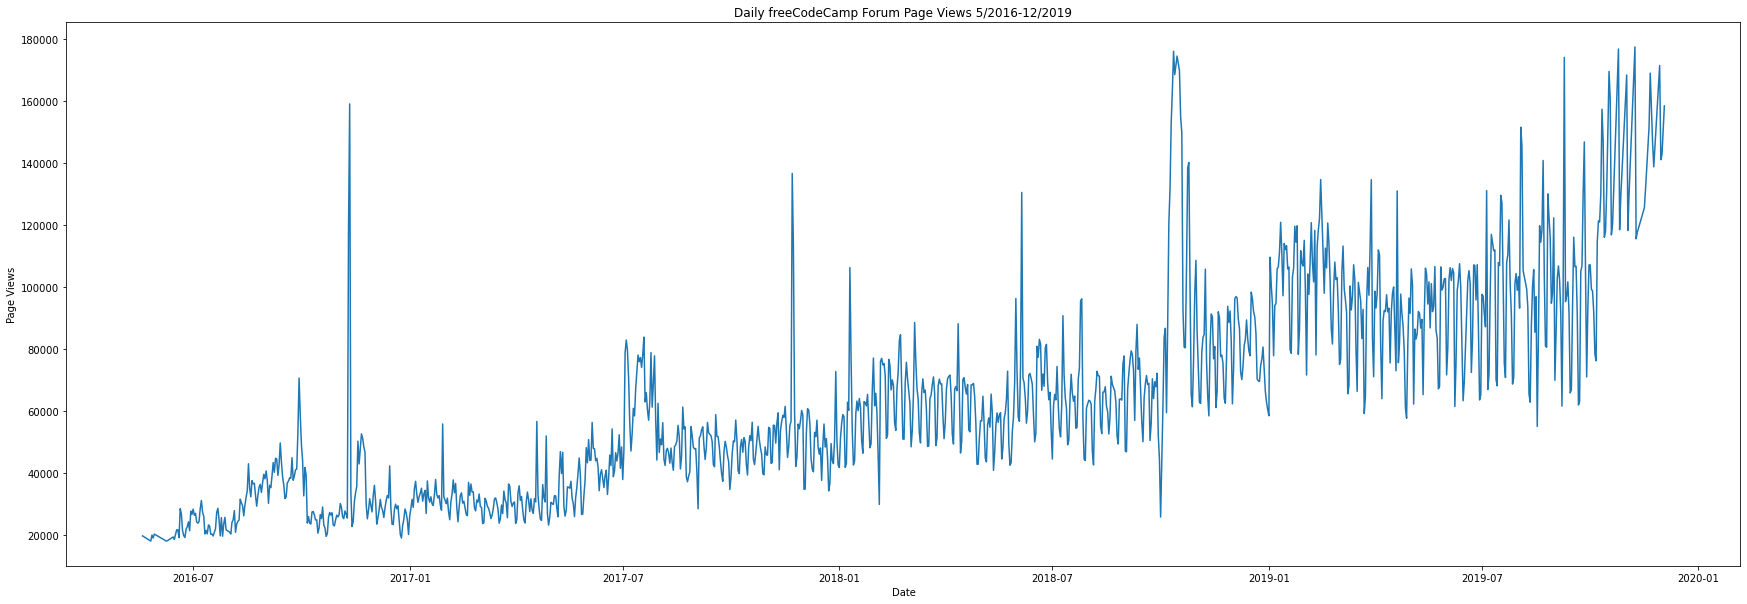

In [6]:
f = draw_line_plot()

### Bar plot

Drawing box plot which shows average daily page views for each month grouped by year

In [7]:
def draw_bar_plot():
    # Prepare data
    df["month"] = df.index.month
    df["year"] = df.index.year
    df_bar = df.groupby(["year", "month"])["value"].mean()
    df_bar = df_bar.unstack()
    

    # Draw bar plot
    fig = df_bar.plot(kind ="bar", legend = True, figsize = (20,10)).figure
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(labels = ['January', 'February', 'March', 'April', 'May',
                         'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    
    return fig

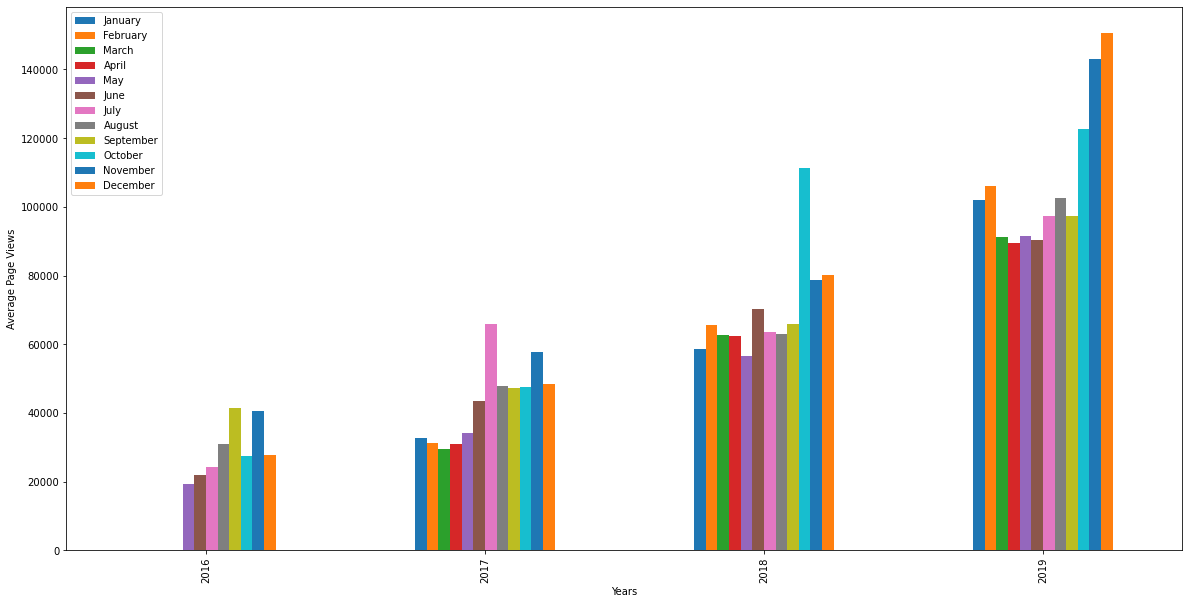

In [8]:
f1 = draw_bar_plot()

### Box plot

These box plots that show how the values are distributed within a given year or month and how it compares over time

In [9]:
def draw_box_plot():
    # Prepare data
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))                       
    axes[0] = sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set(xlabel='Year', ylabel='Page Views', title='Year-wise Box Plot (Trend)')
    new_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                  'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    axes[1] = sns.boxplot(x='month', y='value', data=df_box, palette=sns.color_palette("Paired", n_colors=12), ax=axes[1])
    axes[1].set(xlabel='Month', ylabel='Page Views', title='Month-wise Box Plot (Seasonality)', xticklabels=new_labels)

    return fig

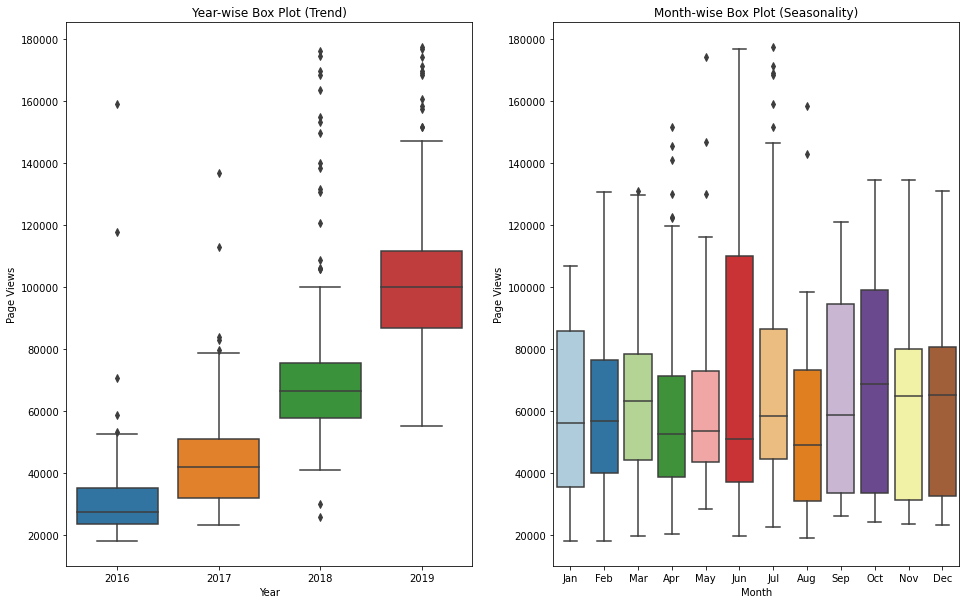

In [10]:
f2 = draw_box_plot()

The year-wise trend clearly shows constant growth over the years in views on the freeCodeCamp.org forum. There is a visible rising trend on daily views graph. We can observe an increase in the average views between particular months of a given year to the next, with exception of July 2017 - July 2018. Visualizations of the dataset are clear evidence of platform growth.